#602 Final Project

In this project the utimate goal is to predict the sentiment of the given text data . There are 4 datasets provided in which we are not supposed to use the y_train dataset directly .by using X_train we have to build the model and test on the Production data set provided i.e X_final and y_final. The Training dataset appears to be like movie review with positive and negative sentiment (0,1). 

#importing all necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.semi_supervised import LabelSpreading
from sklearn.preprocessing import Normalizer

Loading the data to the dataframe

In [ ]:
import pandas as pd

df = pd.read_csv('/content/sample_data/X_train.csv')

df.head()

,review
0,"Shame, is a Swedish film in Swedish with Engli..."
1,I know it's rather unfair to comment on a movi...
2,"""Bread"" very sharply skewers the conventions o..."
3,After reading tons of good reviews about this ...
4,During the Civil war a wounded union soldier h...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  40000 non-null  object
dtypes: object(1)
memory usage: 312.6+ KB


In [ ]:
df.describe()

,review
count,40000
unique,39719
top,Loved today's show!!! It was a variety and not...
freq,5


We have checked the df.describe because it will give the unique value counts .By observing that we can check weather there are any duplicates. from above we can see that if total is 40000 we got only 39719 unique rows.we have to drop the duplicate rows now.

In [ ]:
df=df.drop_duplicates()
df.head()

,review
0,"Shame, is a Swedish film in Swedish with Engli..."
1,I know it's rather unfair to comment on a movi...
2,"""Bread"" very sharply skewers the conventions o..."
3,After reading tons of good reviews about this ...
4,During the Civil war a wounded union soldier h...


Sanity check after dropping the duplicates.

In [ ]:
df.shape

(39719, 1)

Check for null values. null values place a major role in disturbing the model evaluation .It is must to check the null values.If there are any null values better to replace them with near values or most keep it as N/A but do not drop them.

In [ ]:
null_values = df.isnull().sum()
print(null_values)

review    0
dtype: int64


#Data Cleaning

In [1]:
#Tokenization
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()
df['review'] = news['text'].apply(tokenizer.tokenize)
print('Tokenization complete.')

Tokenization complete.


This code is performing tokenization on the "review" column of the df dataframe. The TreebankWordTokenizer from the nltk.tokenize module is used to tokenize the sentences in the text column. The tokenizer breaks down the text into individual words or tokens, considering punctuations as separate tokens as well. The tokens are then saved in the review column of the df dataframe. Finally, a message is printed to indicate that the tokenization process is complete.

In [ ]:
#Lemmatization
import nltk
nltk.download('wordnet')
nltk.download('punkt')
lemmatizer = nltk.stem.wordnet.WordNetLemmatizer()
df['review'] = df['review'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(str(x))]))

The process of reducing the different forms of a word to one single form, for example, reducing "builds," "building," or "built" to the lemma "build" is called lemmatization.

The given code uses the nltk library to perform lemmatization on the text data in the 'review' column of the 'df' DataFrame.

Firstly, it downloads the necessary resources for word lemmatization. Next, a WordNetLemmatizer object is created to find the base form of each word in the text data.

The code applies the lemmatization process to each row of the 'review' column of the 'df' DataFrame by using the apply function. Inside the apply function, a lambda function is used to apply the lemmatizer to each word in the text data. The words are tokenized using the nltk.word_tokenize function and a list comprehension is used to apply the lemmatizer to each word. Finally, the lemmatized words are joined together into a string separated by a space

In summary, this code performs lemmatization on text data in the 'df' DataFrame to standardize the text and enhance the accuracy of text analysis or modeling

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['review'])


Why TfidVectorizer?

Before building the model, we need to convert the text in the 'review' column into a format that can be understood by the machine learning algorithm. In natural language processing, machines require numerical input instead of raw text.

To accomplish this, we use a technique called TF-IDF (Term Frequency-Inverse Document Frequency) representation. TF-IDF calculates the significance of words in each document by considering their frequency in the document and their rarity across the entire dataset.

The TfidfVectorizer is a tool that performs this conversion. By applying the fit_transform() method to the 'review' column, we train the vectorizer on the text data and transform it into a matrix of numerical features. Each feature represents the importance of a word in a document.

The resulting matrix, denoted as X_train, will serve as the input for training the machine learning model. It allows the model to learn patterns and make predictions based on the numerical representation of the text.

#Sanity check

In [ ]:

X.dtype

dtype('float64')

By above output our expected outcome is satisfied and the words are transformed to intergers for model training.

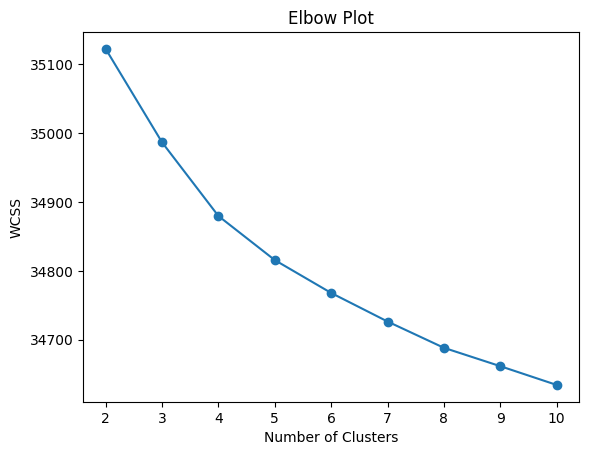

In [ ]:
import matplotlib.pyplot as plt
wcss = []

for num_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(2, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Plot')
plt.show()


The provided code snippet helps determine the optimal number of clusters using the Elbow Method. By iterating over different numbers of clusters and calculating the within-cluster sum of squares (WCSS), it identifies the number of clusters that strikes a balance between minimizing WCSS and avoiding overfitting. The code plots the number of clusters against WCSS values, enabling the identification of an "elbow" point that indicates the optimal cluster number. This approach is useful for finding a suitable clustering solution based on the WCSS plot's visual analysis. However, it's important to consider other factors and metrics alongside the elbow point for a comprehensive evaluation.

In [ ]:

from sklearn.cluster import KMeans
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)
df['cluster_label'] = kmeans.labels_


The code snippet utilizes  KMeans modules from scikit-learn for performing clustering. It applies K-means clustering with a predefined number of clusters (5) to the given dataset (X). The resulting cluster labels are then assigned to a new column in the DataFrame (df) to indicate the cluster membership of each data point.

In [ ]:
# Assign sentiment labels based on the cluster labels
df['sentiment'] = 0
df.loc[df['cluster_label'].isin([0, 2, 4]), 'sentiment'] = 1
df.loc[df['cluster_label'].isin([1, 3]), 'sentiment'] = 0

The code assigns sentiment labels to the DataFrame based on the cluster labels obtained from the previous clustering step. It creates a new column called 'sentiment' and initializes it with 0 for all data points. Then, it selectively updates the 'sentiment' values based on the cluster labels. Cluster labels 0, 2, and 4 are assigned a sentiment label of 1, indicating positive sentiment, while cluster labels 1 and 3 are assigned a sentiment label of 0, indicating negative sentiment. In summary, the code modifies the 'sentiment' column to reflect the sentiment associated with each cluster.Here we just mapped by randomly first and lets build model and check the accuracy.

In [ ]:
df.head()

,review,cluster_label,sentiment
0,"Shame, is a Swedish film in Swedish with Engli...",1,0
1,I know it's rather unfair to comment on a movi...,2,1
2,"""Bread"" very sharply skewers the conventions o...",1,0
3,After reading tons of good reviews about this ...,2,1
4,During the Civil war a wounded union soldier h...,3,0


#Model Building
LogisticRegression

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
X = df['review']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', LogisticRegression(max_iter=5000))
])
lr_pipeline.fit(X_train, y_train)
y_pred = lr_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82      2980
           1       0.88      0.91      0.90      5020

    accuracy                           0.87      8000
   macro avg       0.86      0.85      0.86      8000
weighted avg       0.87      0.87      0.87      8000



Why pipeline?

Pipelines are used in machine learning to organize and automate the steps involved in data preprocessing and model training. They ensure code readability, reproducibility, and ease of deployment. Pipelines also enable parameter tuning, prevent data leakage, and simplify model selection. They enhance efficiency and maintainability in machine learning workflows.

the code builds a pipeline that transforms text data into numerical features using TF-IDF and trains a logistic regression model to predict sentiment labels. The performance of the model is evaluated using a classification report.



#Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'vectorizer__max_features': [1000, 2000, 3000], 
    'classifier__C': [0.1, 1, 10] 
}
grid_search = GridSearchCV(lr_pipeline, param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
classification_rep = classification_report(y_test, y_pred)
print("Best Model Hyperparameters:")
print(grid_search.best_params_)
print("\nClassification Report:")
print(classification_rep)

Best Model Hyperparameters:
{'classifier__C': 1, 'vectorizer__max_features': 2000}

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      2980
           1       0.88      0.91      0.89      5020

    accuracy                           0.86      8000
   macro avg       0.86      0.85      0.85      8000
weighted avg       0.86      0.86      0.86      8000



We used GridSearch for various reasons like to increase the evaluation parameters and also for cross validation.

In the given code, GridSearchCV is used to perform hyperparameter tuning on the LR pipeline. The parameter grid specifies different values to be explored for the max_features parameter of the vectorizer and the C parameter of the logistic regression classifier. The grid search is performed using 5-fold cross-validation and the scoring metric used is 'f1_weighted'. The best model is selected based on the highest score obtained.

After fitting the grid search object to the training data, the best_model variable stores the estimator with the best hyperparameters. This model is then used to predict the labels for the test data. The classification_report function is used to generate a report containing precision, recall, F1-score, and support for each class. Finally, the best hyperparameters and the classification report are printed to the console

In [ ]:
X_final=pd.read_csv(r'/content/sample_data/X_final.csv')
y_final=pd.read_csv(r'/content/sample_data/y_final.csv')
y_pred = lr_pipeline.predict(X_final['review'])
print(classification_report(y_final, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.40      0.48      5000
           1       0.55      0.72      0.62      5000

    accuracy                           0.56     10000
   macro avg       0.57      0.56      0.55     10000
weighted avg       0.57      0.56      0.55     10000



Here, we test our model on production data set of X_final and y_final.we got accuracy of 56% on the test data set. which is very less , this due to mapping of sentiments ,as we did it without any logic for labelling . So we will try to get different approach by using semi supervised learning , using y_train with just 1000 instances let us try to build few models.

In [ ]:
X_train = pd.read_csv(r'/content/sample_data/X_train.csv')
y_train = pd.read_csv(r'/content/sample_data/y_train.csv')
X_test = pd.read_csv(r'/content/sample_data/X_final.csv')
y_test = pd.read_csv(r'/content/sample_data/y_final.csv')

In [ ]:
y_train[1000:] = -1
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

 We are taking only 1000 instances as a labelled data and remaning we are assigning to -1 as unlabelled data . Here The given code modifies the training labels by assigning the value -1 to a subset of elements starting from the index 1000. Then, it flattens the training and testing label arrays to ensure they are in the expected format for machine learning algorithms. These operations are performed to designate unlabeled instances and prepare the label data for subsequent analysis or model training.

In [ ]:
# Sanity check
print("Sanity check:")
print("Number of instances in y_train:", len(y_train))
print("Number of instances in y_test:", len(y_test))

Sanity check:
Number of instances in y_train: 40000
Number of instances in y_test: 10000


In [ ]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train['review'])
X_test = vectorizer.transform(X_test['review'])

In [ ]:
%pip install xgboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


I have installed xgboost because while running the model it is found that no module while i was importing .So, I installed it.

Logistic Regression, eXtreme Gradient Boosting, Random Forest models

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.semi_supervised import SelfTrainingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Define base classifiers
lr = LogisticRegression(solver='liblinear')
rf = RandomForestClassifier(n_estimators=100)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define SelfTrainingClassifiers
stc_lr = SelfTrainingClassifier(lr)
stc_rf = SelfTrainingClassifier(rf)
stc_xgb = SelfTrainingClassifier(xgb)

# Fit the models
stc_lr.fit(X_train, y_train)
stc_rf.fit(X_train, y_train)
stc_xgb.fit(X_train, y_train)

# Predict the labels
y_pred_lr = stc_lr.predict(X_test)
y_pred_rf = stc_rf.predict(X_test)
y_pred_xgb = stc_xgb.predict(X_test)

# Print the accuracy score
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print(f'Accuracy of Logistic Regression: {accuracy_lr}')
print(f'Accuracy of Random Forest: {accuracy_rf}')
print(f'Accuracy of XGBoost: {accuracy_xgb}')

Accuracy of Logistic Regression: 0.6708
Accuracy of Random Forest: 0.5304
Accuracy of XGBoost: 0.7742


The provided code demonstrates the use of different classifiers, including Logistic Regression, Random Forest, and XGBoost, along with the SelfTrainingClassifier for semi-supervised learning. The models are trained using the training data and then used to predict labels for the test data. The accuracy scores are calculated to evaluate the performance of each classifier. The purpose is to compare how well these classifiers perform in the semi-supervised learning scenario and identify the most accurate one.

Why these models ?

The models used in the code serve different purposes and have their own strengths. Logistic Regression is chosen for its simplicity and interpretability, making it suitable for binary classification tasks. Random Forest is an ensemble model that combines multiple decision trees to handle complex relationships in the data and mitigate overfitting. XGBoost, a gradient boosting implementation, is known for its ability to capture intricate patterns in data and deliver high predictive accuracy. The selection of these models depends on factors such as the problem at hand, data characteristics, and the desired performance. Experimentation with different models helps identify the most effective one for the specific task.

SelfTrainingClassifier:

The SelfTrainingClassifier is used in the code to perform semi-supervised learning. In some scenarios, we may have a limited amount of labeled data but a large amount of unlabeled data. The SelfTrainingClassifier leverages this unlabeled data by making predictions on it using an initial classifier and then incorporating those predictions as additional labeled data. This iterative process continues, with the classifier being retrained on the newly labeled data, until convergence or a predefined stopping criterion is reached.

Self-training can be beneficial in situations where obtaining labeled data is expensive or time-consuming. By utilizing the unlabeled data, it helps improve the model's performance and potentially overcome the limitations of having a small labeled dataset. It can also be useful when the initial labeled data is not representative of the entire dataset, as self-training allows the model to adapt and generalize better.

In the code, the SelfTrainingClassifier is applied with different base classifiers (Logistic Regression, Random Forest, XGBoost) to leverage the unlabeled data and enhance their predictive performance. By incorporating the unlabeled data in the learning process, the models can potentially make more accurate predictions and improve their overall accuracy

In [ ]:
y_train

array([1, 0, 1, ..., 2, 2, 2])

Now , let us perform hyperparameter tuning and cross validation the model by grid search to increase the model efficiency.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define base classifiers
lr = LogisticRegression()
rf = RandomForestClassifier()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Create pipeline
pipeline_lr = Pipeline([('clf', lr)])
pipeline_rf = Pipeline([('clf', rf)])
pipeline_xgb = Pipeline([('clf', xgb)])

# Define parameter grid
param_grid_lr = {'clf__C': [0.1, 1, 10], 'clf__solver': ['liblinear']}
param_grid_rf = {'clf__n_estimators': [50, 100, 200]}
param_grid_xgb = {'clf__n_estimators': [50, 100, 200], 'clf__learning_rate': [0.01, 0.1, 1]}

# Create GridSearchCV
grid_lr = GridSearchCV(pipeline_lr, param_grid=param_grid_lr, cv=5, verbose=1)
grid_rf = GridSearchCV(pipeline_rf, param_grid=param_grid_rf, cv=5, verbose=1)
grid_xgb = GridSearchCV(pipeline_xgb, param_grid=param_grid_xgb, cv=5, verbose=1)

# Fit the models
grid_lr.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)
grid_xgb.fit(X_train, y_train)

# Print best scores
print(f'Best score Logistic Regression: {grid_lr.best_score_}')
print(f'Best score Random Forest: {grid_rf.best_score_}')
print(f'Best score XGBoost: {grid_xgb.best_score_}')

# Predict the labels
y_pred_lr = grid_lr.predict(X_test)
y_pred_rf = grid_rf.predict(X_test)
y_pred_xgb = grid_xgb.predict(X_test)

# Print the accuracy score
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print(f'Accuracy of Logistic Regression: {accuracy_lr}')
print(f'Accuracy of Random Forest: {accuracy_rf}')
print(f'Accuracy of XGBoost: {accuracy_xgb}')

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best score Logistic Regression: 0.900175
Best score Random Forest: 0.8524750000000001
Best score XGBoost: 0.854175
Accuracy of Logistic Regression: 0.8996
Accuracy of Random Forest: 0.8569
Accuracy of XGBoost: 0.8527


After performing the grid we got the test accuracy of the following models as:

Logistic Regression: 89

Random Forest: 85

XGBoost: 85

We see that this approach has got more accuracy because we used only 1000 instances and SelfTrainingClassifier plays a major role in predicting labels as it is a iterative process of predicting labels. 

#Conclusion:
We have done 2 approaches to predict the label in the first approach we got just 56% of accuracy for logistic regression model. Later we have taken different approach to predict the label that is using some of y_train values . We have taken 1000 instances lablels and treating remaining all as unlabelled data.Later while building model I used SelfTraining Classifier , which labels the unlabelled data in a iterative way.We have built logistic regression,randomforest and XGBoost model.

By observing result of models we see that XGBoost , Random forest are  giving accuracy of 85 while logistic regression is giving more accuracy of 89. 

So, for predicting the labels in the production data set these models you can use it to predict sentiment.